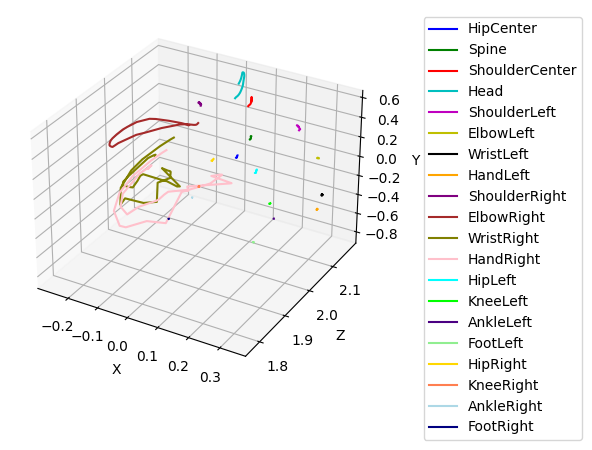

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure


# Définir le chemin du fichier
pathData = r"C:\workspace2\Datasets\Chalearn\Data\Sample00001_data.txt"

# Frames de début et fin à extraire
debut = 160
fin = 219

# Initialiser les listes pour stocker les coordonnées des articulations
coordonnees_articulations = [[] for _ in range(20)]

# Lire les données à partir du fichier
with open(pathData, 'r') as file:
    lines = file.readlines()
    for line in lines[debut-1:fin]:  # Notez que Python utilise des indices 0-based
        # Diviser chaque ligne en coordonnées d'articulation
        articulations = [float(coord) for coord in line.split()]
        # Diviser les coordonnées en x, y, z pour chaque articulation
        for i in range(20):
            coordonnees_articulations[i].append(articulations[i * 3 : (i + 1) * 3])

# Créer le graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# fig = ipv.figure()
# Couleurs pour chaque articulation
couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown',
            'olive', 'pink', 'cyan', 'lime', 'indigo', 'lightgreen', 'gold',
            'coral', 'lightblue', 'navy']

etiquettes = ["HipCenter", "Spine", "ShoulderCenter", "Head",
              "ShoulderLeft", "ElbowLeft", "WristLeft", "HandLeft",
              "ShoulderRight", "ElbowRight", "WristRight", "HandRight",
              "HipLeft", "KneeLeft", "AnkleLeft", "FootLeft",
              "HipRight", "KneeRight", "AnkleRight", "FootRight"]
# Afficher les trajectoires des articulations
for i in range(0,20,1):
    traj = coordonnees_articulations[i]
    x, y, z = zip(*traj)  # Séparer les coordonnées x, y, z
    ax.plot(x, z, y, color=couleurs[i], label=f'{etiquettes[i]}')

# Paramètres du graphique
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

# ax.set_title('Trajectoires des articulations')
ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

# Afficher le graphique
# plt.show()
plt.savefig('trajectoires_articulations.pdf', format='pdf', bbox_inches='tight')
